In [ ]:
import numpy as np
import yfinance as yf
from arch import arch_model

In [1]:
%matplotlib inline
import matplotlib as plt

plt.rc("figure", figsize=(16, 6))
plt.rc("savefig", dpi=90)
plt.rc("font", family="sans-serif", size=14)


In [16]:
data = yf.download("aapl", start="2020-01-01", end="2022-07-31")

[*********************100%***********************]  1 of 1 completed


In [17]:
adjusted_closes = data['Adj Close']
returns = 100 * adjusted_closes.pct_change().dropna()

In [18]:
model = arch_model(returns)

"""
from arch import ConstantMean, GARCH, Normal

am = ConstantMean(returns)
am.volatility = GARCH(1, 0, 1)
am.distribution = Normal()
"""

'\nfrom arch import ConstantMean, GARCH, Normal\n\nam = ConstantMean(returns)\nam.volatility = GARCH(1, 0, 1)\nam.distribution = Normal()\n'

In [19]:
res = model.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 2574.745038280961
Iteration:      2,   Func. Count:     15,   Neg. LLF: 22627.005006211653
Iteration:      3,   Func. Count:     22,   Neg. LLF: 1786.8091399749765
Iteration:      4,   Func. Count:     29,   Neg. LLF: 1628.759199202041
Iteration:      5,   Func. Count:     36,   Neg. LLF: 1391.3566351395582
Iteration:      6,   Func. Count:     42,   Neg. LLF: 1386.0239467999359
Iteration:      7,   Func. Count:     47,   Neg. LLF: 1386.0233140121022
Iteration:      8,   Func. Count:     52,   Neg. LLF: 1386.023283094732
Iteration:      9,   Func. Count:     57,   Neg. LLF: 1386.0232822727319
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1386.0232822727319
            Iterations: 9
            Function evaluations: 57
            Gradient evaluations: 9


In [20]:
print(res.summary)

<bound method ARCHModelResult.summary of                      Constant Mean - GARCH Model Results                      
Dep. Variable:              Adj Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1386.02
Distribution:                  Normal   AIC:                           2780.05
Method:            Maximum Likelihood   BIC:                           2797.94
                                        No. Observations:                  648
Date:                Sat, Dec 10 2022   Df Residuals:                      647
Time:                        10:50:20   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.2180  

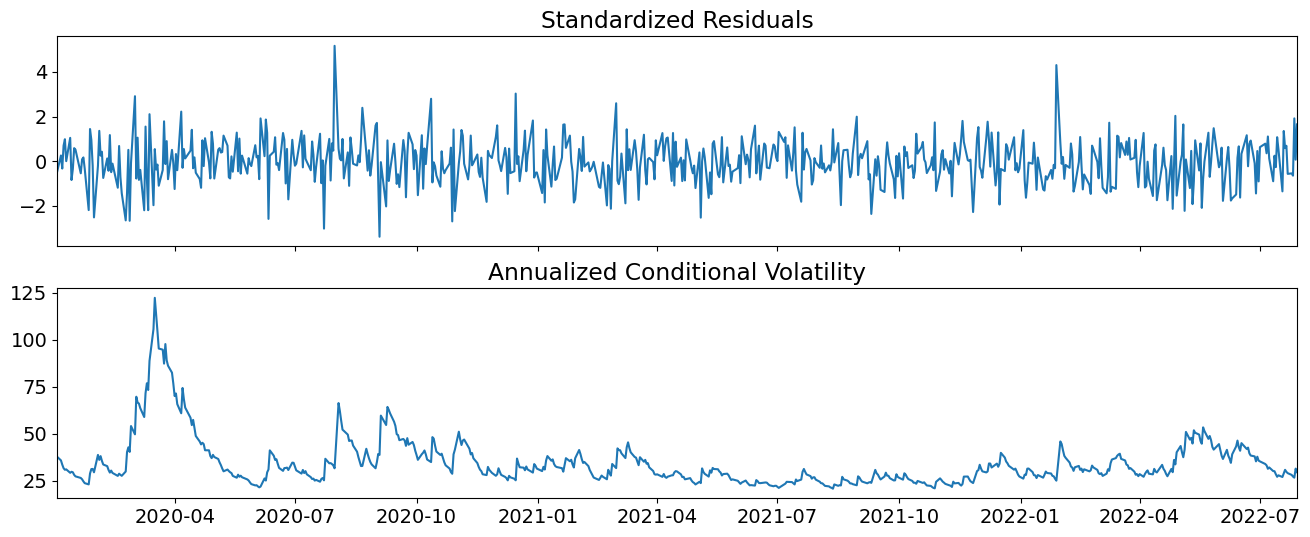

In [21]:
fig = res.plot("D")

In [12]:
forecast = res.forecast(horizon=1, reindex=False)
variance_forecast = forecast.variance.iloc[-1][0]

In [13]:
volatility_forecast = np.sqrt(variance_forecast)
annualized_volatility_forecast = volatility_forecast * np.sqrt(252) / 100
# Cette VOL est issu de la prediction du GARCH a comparer avec les IV de l'Option Wheel 
# et trade le mispricing
annualized_volatility_forecast

0.32961142315936115